In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l2_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\Ai-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8641975308641975, Loss: 0.8098396018699363
Checkpoint 20, Accuracy: 0.8641975308641975, Loss: 0.6435091937029803
Checkpoint 30, Accuracy: 0.8395061728395061, Loss: 0.6091557255497685
Checkpoint 40, Accuracy: 0.8148148148148148, Loss: 0.5774972703721788
Checkpoint 50, Accuracy: 0.8580246913580247, Loss: 0.547353673864294
Checkpoint 60, Accuracy: 0.8765432098765432, Loss: 0.5268111758761935
Checkpoint 70, Accuracy: 0.8827160493827161, Loss: 0.48151542522289137
Checkpoint 80, Accuracy: 0.8827160493827161, Loss: 0.4175204524287471
Checkpoint 90, Accuracy: 0.9135802469135802, Loss: 0.37974477697301795
Checkpoint 100, Accuracy: 0.9074074074074074, Loss: 0.39571991673222295
Checkpoint 110, Accuracy: 0.8950617283950617, Loss: 0.4065871768527561
Checkpoint 120, Accuracy: 0.9074074074074074, Loss: 0.4040562665020978
Checkpoint 130, Accuracy: 0.9135802469135802, Loss: 0.38427409419307
Checkpoint 140, Accuracy: 0.9135802469135802, Loss: 0.3752399727150246
Checkpoint 150,

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

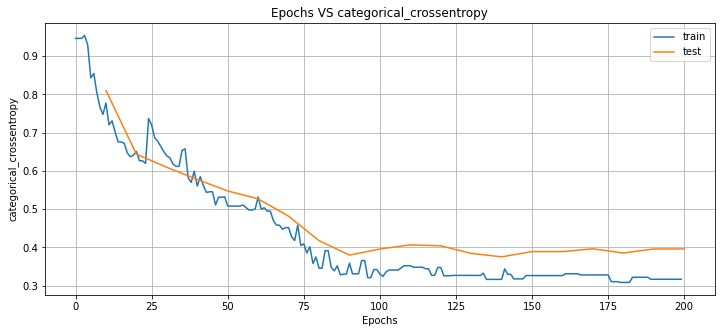

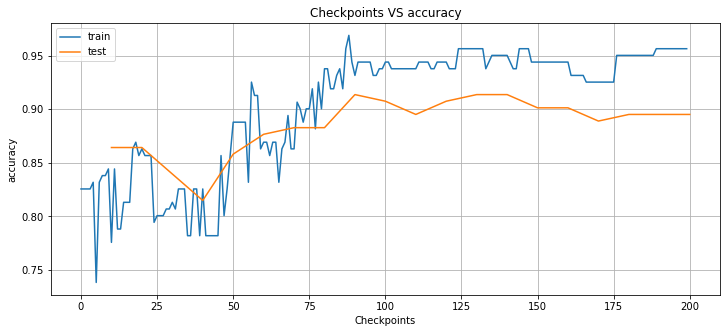

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.81925786 0.11145984 0.06928233]
[1. 0. 0.] <-> [0.79768115 0.12804021 0.07427867]
[1. 0. 0.] <-> [0.8726716  0.06060803 0.06672042]
[1. 0. 0.] <-> [0.8738354  0.04527488 0.08088973]
[0. 1. 0.] <-> [0.6548659  0.3069687  0.03816536]
[1. 0. 0.] <-> [0.83007413 0.05849099 0.11143497]
[1. 0. 0.] <-> [0.67452204 0.24202384 0.08345404]
[1. 0. 0.] <-> [0.8341811  0.0921571  0.07366184]
[0. 0. 1.] <-> [0.1971206  0.0193858  0.78349364]
[1. 0. 0.] <-> [0.79927254 0.09599642 0.10473099]
[1. 0. 0.] <-> [0.6315958  0.31517345 0.05323078]
[1. 0. 0.] <-> [0.8281835  0.08399919 0.08781743]
[1. 0. 0.] <-> [0.8026942  0.07635306 0.12095267]
[1. 0. 0.] <-> [0.63766617 0.19198044 0.17035341]
[1. 0. 0.] <-> [0.85873836 0.03755924 0.10370243]
[1. 0. 0.] <-> [0.7612494  0.05623563 0.18251489]
[1. 0. 0.] <-> [0.76867014 0.14138971 0.08994018]
[1. 0. 0.] <-> [0.845963   0.09436353 0.05967348]
[1. 0. 0.] <-> [0.8694973  0.04320898 0.0872938 ]
[1. 0. 0.] <-> [0.82629085 0.12122779 0.05248133]


In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8641975308641975, 'mean_square_error': 0.37081894155947054, 'categorical_crossentropy': 0.8098396018699363, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 22, 'tn_hit': 8, 'fn_hit': 0}, 1: {'tp_hit': 8, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 8}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 10} 


{'accuracy': 0.8641975308641975, 'mean_square_error': 0.361796811204648, 'categorical_crossentropy': 0.6435091937029803, 'essential_metrics': {0: {'tp_hit': 72, 'fp_hit': 16, 'tn_hit': 14, 'fn_hit': 6}, 1: {'tp_hit': 13, 'fp_hit': 6, 'tn_hit': 86, 'fn_hit': 3}, 2: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 13}}, 'checkpoint': 20} 


{'accuracy': 0.8395061728395061, 'mean_square_error': 0.3500802494499377, 'categorical_crossentropy': 0.6091557255497685, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 26, 'tn_hit': 4, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 12}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit'

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.11812622  0.18637423 -0.92662644 -1.104894   -1.0646069 ]
 bias: 0.6036761999130249

Neuron 1: weights:
[ 0.12886551 -0.8278858  -0.13485387  0.27459013  0.47245356]
 bias: -0.3193891942501068

Neuron 2: weights:
[ 0.46121982 -0.6987117  -0.21869677  0.2685293   0.33780396]
 bias: 0.06650149822235107

Neuron 3: weights:
[-0.78537464  1.1943514   0.8891029   0.16195913 -0.05079494]
 bias: -0.6606693267822266

$
Layer 2
Neuron 0: weights:
[ 1.7502998  -0.23674339  0.2054088  -1.3132405 ]
 bias: 0.4713859260082245

Neuron 1: weights:
[-0.1836824  -0.82550675 -1.2535303   1.7238532 ]
 bias: 0.004163861740380526

Neuron 2: weights:
[-1.6701189   1.001548    1.1645682  -0.66515607]
 bias: -0.28170666098594666

$

